In [2]:
import pandas as pd
import os

In [3]:
df_jan =pd.read_csv("C:\\Users\\USER\\Desktop\\workspace\\Sales_Data\\Sales_January_2019.csv")
df_jan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [4]:
#Since we have sales data for a year stored on monthly basis, we'll iterate through the directory to get alll the monthly data.

files = [file for file in os.listdir("C:\\Users\\USER\\Desktop\\workspace\\Sales_Data")]
for file in files:
    print(file)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
#We're going to create an empty dataframe so that we can append the data from all months to the dataframe.
#Our aim is to have the data for a year in a single dataframe.

all_mnths = pd.DataFrame()
for file in files:
    df = pd.read_csv("C:\\Users\\USER\\Desktop\\workspace\\Sales_Data\\"+file)
    all_mnths = pd.concat([all_mnths, df])
all_mnths.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
#Let's check the number of rows to confirm if the data has been appended on the df.
all_mnths.shape


(186850, 6)

In [8]:
#Now, we'll save it into a csv file
all_mnths.to_csv('yearly_sales', index = False)

In [9]:
#Loading the dataframe from the system
df_ = pd.read_csv('yearly_sales')
df_.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [11]:
#Lets confirm the rows that have NaN values
df_nan = df_[df_.isna().any(axis=1)]
df_nan
#From the output, we can see that we have 545 blank rows and we have to remove them.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_ = df_.dropna(how ='all')
#This line of code drops all rows where all the columns are NaN values.
df_.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
#Before we begin our analysis, we will add more columns to give more details to our data.

#### 1. Which month had the best sales and how much was earned?

In [13]:
df_['Month'] = df_['Order Date'].str[:2]
df_['Month'] = df_['Month'].astype('int32')
df_.head()
#This is not running due to some rows on the date column containing 'Or' as the first 2 characters. let's check for them

ValueError: invalid literal for int() with base 10: 'Or'

In [14]:
or_df =df_[df_['Order Date'].str[:2] == 'Or']
or_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [15]:
#we'll drop those rows with 'Or' in the date column. waste of data...
df_ =df_[df_['Order Date'].str[:2] != 'Or']
df_

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [16]:
#Some codes are being duplicated to emphasize the steps in the data cleaning process.
df_['Month'] = df_['Order Date'].str[:2]
df_['Month'] = df_['Month'].astype('int32')
df_.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [17]:
#Let's convert all columns to the appropriate types.
df_['Quantity Ordered'] = pd.to_numeric(df_['Quantity Ordered'])
df_['Price Each'] = df_['Price Each'].astype(float)




In [18]:
df_['Sales'] = df_['Quantity Ordered'] * df_['Price Each']
df_

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [19]:
#Let's reorder the columns
df_ = df_[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Month',
       'Purchase Address' ]]
df_

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,9,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,700.00,09/01/19 16:00,9,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,700.00,09/23/19 07:39,9,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,9,"511 Forest St, San Francisco, CA 94016"


In [20]:
#BAck to the Question - MOnth with the highest sales and amount earned.
results = df_.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


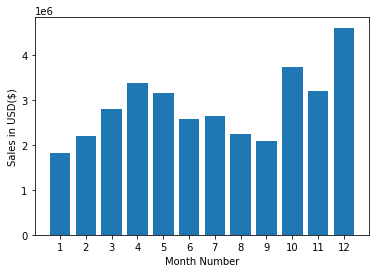

In [21]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')
plt.show()

#### 2. What city had the highest number of sales?

In [24]:
#We're going to change the data type of the purchase address column to string so that we can apply .split method on it.
df_['Purchase Address'] = df_['Purchase Address'].astype(str)

In [25]:
#Now we need to add a city column

#We'll use the .apply function since it allows us to use any function on our DataFrame.
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
#The double splits helps us to get the state where the city is located to prevent confusion.

df_['City'] = df_['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x) )
#We could also use an f string to reformat the code
# df_['City'] = df_['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df_

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston MA
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,9,"840 Highland St, Los Angeles, CA 90001",Los Angeles CA
186846,259354,iPhone,1,700.00,700.00,09/01/19 16:00,9,"216 Dogwood St, San Francisco, CA 94016",San Francisco CA
186847,259355,iPhone,1,700.00,700.00,09/23/19 07:39,9,"220 12th St, San Francisco, CA 94016",San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,9,"511 Forest St, San Francisco, CA 94016",San Francisco CA


In [39]:
city_results = df_.groupby('City').sum()
city_results

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta GA,16602,2779908.20,2795498.58,104794
Austin TX,11153,1809873.61,1819581.75,69829
Boston MA,22528,3637409.77,3661642.01,141112
Dallas TX,16730,2752627.82,2767975.40,104620
Los Angeles CA,33289,5421435.23,5452570.80,208325
New York City NY,27932,4635370.83,4664317.43,175741
Portland ME,2750,447189.25,449758.27,17144
Portland OR,11303,1860558.22,1870732.34,70621
San Francisco CA,50239,8211461.74,8262203.91,315520


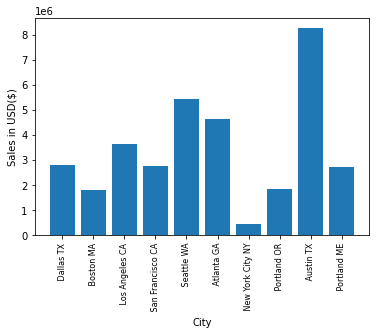

In [40]:
import matplotlib.pyplot as plt

cities = df_['City'].unique()
plt.bar(cities, city_results['Sales'])
plt.xticks(cities, rotation= 'vertical', size = 8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City')
plt.show()
#From the plot below, we can see that Austin TX has the highest sales which is wrong based on the dataframe we have.
#This is because when we use .unique(), the order in the bar chart becomes distorted.

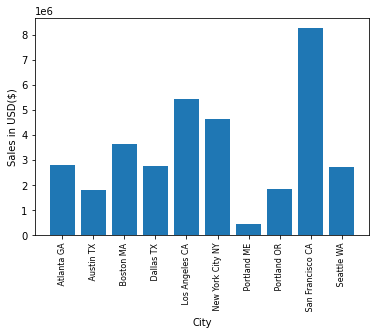

In [41]:
#We'll use list comprehension to achieve cohesion between city and sales figure.
import matplotlib.pyplot as plt

cities = [city for city, df in df_.groupby('City')]
plt.bar(cities, city_results['Sales'])
plt.xticks(cities, rotation= 'vertical', size = 8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City')
plt.show()

#### 3. What time should we display advertisement to improve the likelyhood of a customer buying a product?

In [42]:
#To do this we have to convert the order date type to date time.
df_['Order Date'] = pd.to_datetime(df_['Order Date'])

In [43]:
#Let's create columns for Hour, minute and count
df_['Hour'] = df_['Order Date'].dt.hour
df_['Minute'] = df_['Order Date'].dt.minute
df_['Count'] = 1

In [44]:
df_.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston MA,22,30,1
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38,1
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,9,27,1


In [45]:
df_.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


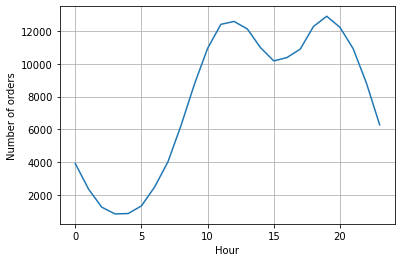

In [46]:
hours = df_.groupby(['Hour']).count()
y = hours['Count']
y
plt.plot(y)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.show()


In [ ]:
# hours = [hour for hour, df in df_.groupby('Hour')]
# plt.plot(hours, df_.groupby(['Hour']).count())
# plt.xticks(hours)
# plt.grid()
# plt.xlabel('Hour')
# plt.ylabel('Number of orders')
# plt.show

In [ ]:
#From the chart above, we can see that the most orders came in at the 19th hour followed by the 12th hour.
#Therefore, the advertisement can be placed on those hours.
#We can as well check the time when most orders were placed per city so that we can time the adverts appropriately in each city.

#### 4. What 2 products were ordered together?

In [47]:
#To approach this question, we'll look out for order IDs that are same and have the same order address.
df_.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston MA,22,30,1
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38,1
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,9,27,1


In [48]:
dup = df_[df_['Order ID'].duplicated(keep = False)]

dup.head(30)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour,Minute,Count
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38,1
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,4,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA,19,42,1
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,4,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA,19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,4,"823 Highland St, Boston, MA 02215",Boston MA,11,31,1
31,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,4,"823 Highland St, Boston, MA 02215",Boston MA,11,31,1
32,176586,AAA Batteries (4-pack),2,2.99,5.98,2019-04-10 17:00:00,4,"365 Center St, San Francisco, CA 94016",San Francisco CA,17,0,1
33,176586,Google Phone,1,600.00,600.00,2019-04-10 17:00:00,4,"365 Center St, San Francisco, CA 94016",San Francisco CA,17,0,1
119,176672,Lightning Charging Cable,1,14.95,14.95,2019-04-12 11:07:00,4,"778 Maple St, New York City, NY 10001",New York City NY,11,7,1
120,176672,USB-C Charging Cable,1,11.95,11.95,2019-04-12 11:07:00,4,"778 Maple St, New York City, NY 10001",New York City NY,11,7,1


In [49]:
#We'll group the products based on the order ID and join the products found on the duplicate order IDs together

dup['Grouped'] = dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
dup.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_23008\2868453735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['Grouped'] = dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38,1,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38,1,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,4,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA,19,42,1,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,4,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA,19,42,1,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,4,"823 Highland St, Boston, MA 02215",Boston MA,11,31,1,"Bose SoundSport Headphones, Bose SoundSport He..."


In [50]:
#drop duplicates
dup = dup[['Order ID', 'Grouped']].drop_duplicates()
dup.head(100)

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable, AAA Batteries (4-pack)"
2683,179128,"iPhone, Apple Airpods Headphones"
2718,179162,"Google Phone, USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor, Macbook Pro Laptop"


In [51]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in dup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)






('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


#### 5. What product sold the most and why?

In [ ]:
#To approach this, we use the sum of the Quantity ordered based on the products

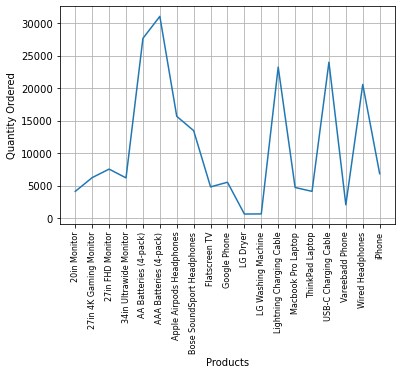

In [65]:
#We can plot a line graph

prod_ = df_.groupby('Product').sum()
prod_
quantity = prod_['Quantity Ordered']
quantity
plt.plot(quantity)
plt.grid()
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation = 'vertical', size=8)
plt.show()

#products = [product for product, df in prod_]

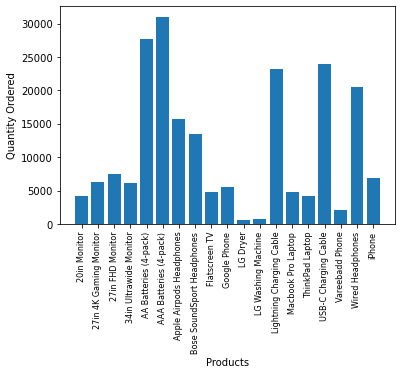

In [67]:
#We can as well plot a bar chart

prod_ = df_.groupby('Product')
quantity = prod_.sum()['Quantity Ordered']

products = [product for product, df in prod_]
plt.bar(products, quantity)
plt.xticks(products, rotation = 'vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()
#From the plot below, we can see that the AAA Batteries(4-pack) sold the most.

C:\Users\USER\AppData\Local\Temp\ipykernel_23008\17279656.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size =8)


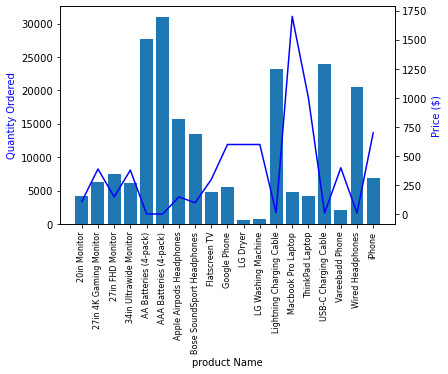

In [110]:
#To see why it sold the most, we check for correlation between the price and the products.
prices = df_.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax1.bar(products, quantity)
ax2 = ax1.twinx()
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('product Name')
ax1.set_ylabel('Quantity Ordered', color = 'b')
ax2.set_ylabel('Price ($)', color ='b')
ax1.set_xticklabels(products, rotation = 'vertical', size =8)
plt.show()
#From the plot, we can see that the most ordered item was one of the cheapest which is the reason is was ordered the most.